![JohnSnowLabs](https://nlp.johnsnowlabs.com/assets/images/logo.png)

[![Open In Colab](https://colab.research.google.com/assets/colab-badge.svg)](https://colab.research.google.com/github/JohnSnowLabs/nlu/blob/master/examples/colab/Training/binary_text_classification/NLU_training_sentiment_classifier_demo_natural_disasters.ipynb)


# Training a Sentiment Analysis Classifier with NLU
## 2 Class Natural Disasters Sentiment Classifer Training
With the [SentimentDL model](https://nlp.johnsnowlabs.com/docs/en/annotators#sentimentdl-multi-class-sentiment-analysis-annotator)  from Spark NLP you can achieve State Of the Art results on any multi class text classification problem

This notebook showcases the following features :

- How to train the deep learning classifier
- How to store a pipeline to disk
- How to load the pipeline from disk (Enables NLU offline mode)

You can achieve these results or even better on this dataset with training data:


<br>

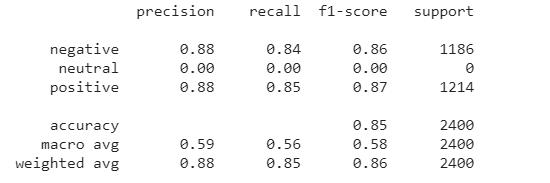

You can achieve these results or even better on this dataset with test  data:


<br>


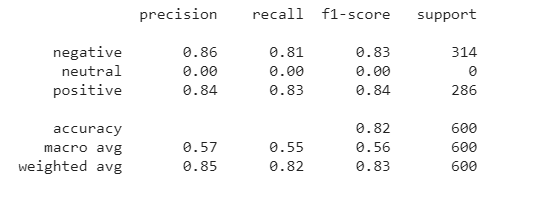

# 1. Install Java 8 and NLU

In [ ]:
!pip install -q johnsnowlabs

# 2. Download Disaster  Sentiment dataset
https://www.kaggle.com/vstepanenko/disaster-tweets
#Context

The file contains over 11,000 tweets associated with disaster keywords like “crash”, “quarantine”, and “bush fires” as well as the location and keyword itself. The data structure was inherited from Disasters on social media

The tweets were collected on Jan 14th, 2020.

Some of the topics people were tweeting:

The eruption of Taal Volcano in Batangas, Philippines
Coronavirus
Bushfires in Australia
Iran downing of the airplane flight PS752
Disclaimer: The dataset contains text that may be considered profane, vulgar, or offensive.

In [2]:
! wget https://s3.amazonaws.com/auxdata.johnsnowlabs.com/public/resources/en/classifier-dl/disaster_tweets/tweets.csv


--2023-11-03 13:51:47--  https://s3.amazonaws.com/auxdata.johnsnowlabs.com/public/resources/en/classifier-dl/disaster_tweets/tweets.csv
Resolving s3.amazonaws.com (s3.amazonaws.com)... 54.231.197.160, 52.217.86.86, 52.217.175.88, ...
Connecting to s3.amazonaws.com (s3.amazonaws.com)|54.231.197.160|:443... connected.
HTTP request sent, awaiting response... 200 OK
Length: 1615005 (1.5M) [text/csv]
Saving to: ‘tweets.csv’

tweets.csv          100%[===================>]   1.54M  3.54MB/s    in 0.4s    

2023-11-03 13:51:48 (3.54 MB/s) - ‘tweets.csv’ saved [1615005/1615005]



In [5]:
train_df

,ï»¿id,keyword,location,text,target
2,2,ablaze,New York City,Arsonist sets cars ablaze at dealership https:...,1
3,3,ablaze,"Morgantown, WV",Arsonist sets cars ablaze at dealership https:...,1
5,5,ablaze,OC,"If this child was Chinese, this tweet would ha...",0
6,6,ablaze,"London, England",Several houses have been set ablaze in Ngemsib...,1
7,7,ablaze,Bharat,Asansol: A BJP office in Salanpur village was ...,1
...,...,...,...,...,...
11362,11362,wrecked,feuille d'Ã©rable,Stell wrecked ako palagi sayo. Haha. #ALABTopS...,0
11365,11365,wrecked,Blue State in a red sea,Media should have warned us well in advance. T...,0
11366,11366,wrecked,arohaonces,i feel directly attacked ð i consider moonb...,0
11367,11367,wrecked,ðµð­,i feel directly attacked ð i consider moonb...,0


In [19]:
import pandas as pd
train_path = '/content/tweets.csv'

train_df = pd.read_csv(train_path,sep=",", encoding='latin-1')
train_df.rename(columns={'target': 'y'}, inplace=True)

# the text data to use for classification should be in a column named 'text'
columns=['text','y']
train_df = train_df.dropna()

train_df = train_df[columns]
train_df = train_df[~train_df["y"].isin(["neutral"])]
train_df['y'] = train_df['y'].replace({0: 'negative', 1: 'positive'})

positive = train_df[train_df['y']==("positive")].iloc[:1500]
negative = train_df[train_df['y']==("negative")].iloc[:1500]
positive = positive.append(negative, ignore_index = True)
positive = positive.sample(frac=1).reset_index(drop=True)
train_df = positive

from sklearn.model_selection import train_test_split

train_df, test_df = train_test_split(train_df, test_size=0.2)
train_df


<ipython-input-19-bf4997bed616>:17: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  positive = positive.append(negative, ignore_index = True)


,text,y
1786,Arsonist sets cars ablaze at dealership https:...,positive
2465,Travis Manawa [about Brandon's group]: I think...,negative
1318,If a scientist said if you jump off a cliff yo...,negative
2177,"#StormBrendon is also bringing high winds, so ...",positive
293,"Like , I'm really talking about blending gener...",negative
...,...,...
666,US Troops Clear Rubble from Iraq Base Days Aft...,positive
2843,can we create an anti-bioterrorism commission?,negative
312,When cultures collide! #southernspain https://...,negative
2072,A look inside a tree that has been struck by l...,positive


# 3. Train Deep Learning Classifier using nlu.load('train.sentiment')

You dataset label column should be named 'y' and the feature column with text data should be named 'text'

In [20]:
from johnsnowlabs import nlp
from sklearn.metrics import classification_report
# load a trainable pipeline by specifying the train. prefix  and fit it on a datset with label and text columns
# by default the Universal Sentence Encoder (USE) Sentence embeddings are used for generation
trainable_pipe = nlp.load('train.sentiment')
fitted_pipe = trainable_pipe.fit(train_df.iloc[:50])

# predict with the trainable pipeline on dataset and get predictions
preds = fitted_pipe.predict(train_df.iloc[:50],output_level='document')
#sentence detector that is part of the pipe generates sone NaNs. lets drop them first
preds.dropna(inplace=True)
print(classification_report(preds['y'], preds['sentiment']))

preds

sent_small_bert_L2_128 download started this may take some time.
Approximate size to download 16.1 MB
[OK!]
              precision    recall  f1-score   support

    negative       0.56      1.00      0.72        28
    positive       0.00      0.00      0.00        22

    accuracy                           0.56        50
   macro avg       0.28      0.50      0.36        50
weighted avg       0.31      0.56      0.40        50



,document,sentence_embedding_small_bert_L2_128,sentiment,sentiment_confidence,text,y
0,Arsonist sets cars ablaze at dealership https:...,"[-0.1667916625738144, 1.0302923917770386, 0.18...",negative,8.0,Arsonist sets cars ablaze at dealership https:...,positive
1,Travis Manawa [about Brandon's group]: I think...,"[-0.9610550999641418, 0.13062980771064758, -0....",negative,2.0,Travis Manawa [about Brandon's group]: I think...,negative
2,If a scientist said if you jump off a cliff yo...,"[-0.6688402891159058, 0.640354335308075, 0.369...",negative,3.0,If a scientist said if you jump off a cliff yo...,negative
3,"#StormBrendon is also bringing high winds, so ...","[-1.0540131330490112, 0.8802893757820129, -0.6...",negative,4.0,"#StormBrendon is also bringing high winds, so ...",positive
4,"Like , I'm really talking about blending gener...","[-1.0963889360427856, -0.39644378423690796, 0....",negative,1.0,"Like , I'm really talking about blending gener...",negative
5,Seriously though... If that defender was taken...,"[-0.9136804938316345, 0.593141496181488, -0.13...",negative,4.0,Seriously though... If that defender was taken...,positive
6,Chemical Hazard - Advice for Cobram. For more ...,"[-0.38091930747032166, 0.6411349177360535, 0.1...",negative,3.0,Chemical Hazard - Advice for Cobram. For more ...,positive
7,"2,400 jobs are at stake should the deal fall t...","[-0.44847720861434937, 0.5910513997077942, -0....",negative,5.0,"2,400 jobs are at stake should the deal fall t...",negative
8,Western Cape blood stocks down to just four da...,"[-0.5973049402236938, 0.3307306170463562, -0.1...",negative,8.0,Western Cape blood stocks down to just four da...,negative
9,Last night in Sweden ð¸ðª 2 BOMBINGS. - Th...,"[-0.5309799313545227, -0.5059896111488342, -0....",negative,0.0,Last night in Sweden ð¸ðª 2 BOMBINGS. - Th...,positive


# 4. Test the fitted pipe on new example

In [21]:
fitted_pipe.predict("All the buildings in the capital were destroyed")

sentence_detector_dl download started this may take some time.
Approximate size to download 354.6 KB
[OK!]


,sentence,sentence_embedding_small_bert_L2_128,sentiment,sentiment_confidence
0,All the buildings in the capital were destroyed,"[-0.33511286973953247, 0.3084930181503296, -1....",negative,0.99924


## 5. Configure pipe training parameters

In [22]:
trainable_pipe.print_info()

The following parameters are configurable for this NLU pipeline (You can copy paste the examples) :
>>> component_list['bert_sentence_embeddings@sent_small_bert_L2_128'] has settable params:
component_list['bert_sentence_embeddings@sent_small_bert_L2_128'].setBatchSize(8)              | Info: Size of every batch | Currently set to : 8
component_list['bert_sentence_embeddings@sent_small_bert_L2_128'].setEngine('tensorflow')      | Info: Deep Learning engine used for this model | Currently set to : tensorflow
component_list['bert_sentence_embeddings@sent_small_bert_L2_128'].setIsLong(False)             | Info: Use Long type instead of Int type for inputs buffer - Some Bert models require Long instead of Int. | Currently set to : False
component_list['bert_sentence_embeddings@sent_small_bert_L2_128'].setMaxSentenceLength(128)    | Info: Max sentence length to process | Currently set to : 128
component_list['bert_sentence_embeddings@sent_small_bert_L2_128'].setDimension(128)            | I

## 6. Retrain with new parameters

In [23]:
# Train longer!
trainable_pipe = nlp.load('train.sentiment')
trainable_pipe['trainable_sentiment_dl'].setMaxEpochs(5)
fitted_pipe = trainable_pipe.fit(train_df.iloc[:50])
# predict with the trainable pipeline on dataset and get predictions
preds = fitted_pipe.predict(train_df.iloc[:50],output_level='document')

#sentence detector that is part of the pipe generates sone NaNs. lets drop them first
preds.dropna(inplace=True)
print(classification_report(preds['y'], preds['sentiment']))

preds

sent_small_bert_L2_128 download started this may take some time.
Approximate size to download 16.1 MB
[OK!]
              precision    recall  f1-score   support

    negative       0.56      1.00      0.72        28
    positive       0.00      0.00      0.00        22

    accuracy                           0.56        50
   macro avg       0.28      0.50      0.36        50
weighted avg       0.31      0.56      0.40        50



,document,sentence_embedding_small_bert_L2_128,sentiment,sentiment_confidence,text,y
0,Arsonist sets cars ablaze at dealership https:...,"[-0.1667916625738144, 1.0302923917770386, 0.18...",negative,0.0,Arsonist sets cars ablaze at dealership https:...,positive
1,Travis Manawa [about Brandon's group]: I think...,"[-0.9610550999641418, 0.13062980771064758, -0....",negative,8.0,Travis Manawa [about Brandon's group]: I think...,negative
2,If a scientist said if you jump off a cliff yo...,"[-0.6688402891159058, 0.640354335308075, 0.369...",negative,3.0,If a scientist said if you jump off a cliff yo...,negative
3,"#StormBrendon is also bringing high winds, so ...","[-1.0540131330490112, 0.8802893757820129, -0.6...",negative,8.0,"#StormBrendon is also bringing high winds, so ...",positive
4,"Like , I'm really talking about blending gener...","[-1.0963889360427856, -0.39644378423690796, 0....",negative,1.0,"Like , I'm really talking about blending gener...",negative
5,Seriously though... If that defender was taken...,"[-0.9136804938316345, 0.593141496181488, -0.13...",negative,5.0,Seriously though... If that defender was taken...,positive
6,Chemical Hazard - Advice for Cobram. For more ...,"[-0.38091930747032166, 0.6411349177360535, 0.1...",negative,9.0,Chemical Hazard - Advice for Cobram. For more ...,positive
7,"2,400 jobs are at stake should the deal fall t...","[-0.44847720861434937, 0.5910513997077942, -0....",negative,6.0,"2,400 jobs are at stake should the deal fall t...",negative
8,Western Cape blood stocks down to just four da...,"[-0.5973049402236938, 0.3307306170463562, -0.1...",negative,0.0,Western Cape blood stocks down to just four da...,negative
9,Last night in Sweden ð¸ðª 2 BOMBINGS. - Th...,"[-0.5309799313545227, -0.5059896111488342, -0....",negative,0.0,Last night in Sweden ð¸ðª 2 BOMBINGS. - Th...,positive


# 7. Try training with different Embeddings

In [24]:
# We can use nlu.print_components(action='embed_sentence') to see every possibler sentence embedding we could use. Lets use bert!
nlp.nlu.print_components(action='embed_sentence')

For language <am> NLU provides the following Models : 
nlu.load('am.embed_sentence.xlm_roberta') returns Spark NLP model_anno_obj sent_xlm_roberta_base_finetuned_amharic
For language <de> NLU provides the following Models : 
nlu.load('de.embed_sentence.bert.base_cased') returns Spark NLP model_anno_obj sent_bert_base_cased
For language <el> NLU provides the following Models : 
nlu.load('el.embed_sentence.bert.base_uncased') returns Spark NLP model_anno_obj sent_bert_base_uncased
For language <en> NLU provides the following Models : 
nlu.load('en.embed_sentence') returns Spark NLP model_anno_obj tfhub_use
nlu.load('en.embed_sentence.albert') returns Spark NLP model_anno_obj albert_base_uncased
nlu.load('en.embed_sentence.bert') returns Spark NLP model_anno_obj sent_bert_base_uncased
nlu.load('en.embed_sentence.bert.base_uncased_legal') returns Spark NLP model_anno_obj sent_bert_base_uncased_legal
nlu.load('en.embed_sentence.bert.finetuned') returns Spark NLP model_anno_obj sbert_setfit_

In [25]:
trainable_pipe = nlp.load('en.embed_sentence.small_bert_L12_768 train.sentiment')
# We need to train longer and user smaller LR for NON-USE based sentence embeddings usually
# We could tune the hyperparameters further with hyperparameter tuning methods like gridsearch
# Also longer training gives more accuracy
trainable_pipe['trainable_sentiment_dl'].setMaxEpochs(120)
trainable_pipe['trainable_sentiment_dl'].setLr(0.0005)
fitted_pipe = trainable_pipe.fit(train_df)
# predict with the trainable pipeline on dataset and get predictions
preds = fitted_pipe.predict(train_df,output_level='document')

#sentence detector that is part of the pipe generates sone NaNs. lets drop them first
preds.dropna(inplace=True)
print(classification_report(preds['y'], preds['sentiment']))

#preds

sent_small_bert_L12_768 download started this may take some time.
Approximate size to download 392.9 MB
[OK!]
              precision    recall  f1-score   support

    negative       0.88      0.85      0.86      1203
     neutral       0.00      0.00      0.00         0
    positive       0.88      0.84      0.86      1197

    accuracy                           0.85      2400
   macro avg       0.59      0.56      0.58      2400
weighted avg       0.88      0.85      0.86      2400



# 7.1 evaluate on Test Data

In [26]:
preds = fitted_pipe.predict(test_df,output_level='document')

#sentence detector that is part of the pipe generates sone NaNs. lets drop them first
preds.dropna(inplace=True)
print(classification_report(preds['y'], preds['sentiment']))

              precision    recall  f1-score   support

    negative       0.85      0.83      0.84       297
     neutral       0.00      0.00      0.00         0
    positive       0.85      0.81      0.83       303

    accuracy                           0.82       600
   macro avg       0.57      0.55      0.56       600
weighted avg       0.85      0.82      0.84       600



# 8. Lets save the model

In [27]:
stored_model_path = './models/classifier_dl_trained'
fitted_pipe.save(stored_model_path)

# 9. Lets load the model from HDD.
This makes Offlien NLU usage possible!   
You need to call nlu.load(path=path_to_the_pipe) to load a model/pipeline from disk.

In [28]:
hdd_pipe = nlp.load(path=stored_model_path)

preds = hdd_pipe.predict('All the buildings in the capital were destroyed')
preds

,document,sentence_embedding_from_disk,sentiment,sentiment_confidence
0,All the buildings in the capital were destroyed,"[-0.39346593618392944, 0.33815115690231323, -0...",positive,0.0


In [29]:
hdd_pipe.print_info()

The following parameters are configurable for this NLU pipeline (You can copy paste the examples) :
>>> component_list['document_assembler'] has settable params:
component_list['document_assembler'].setCleanupMode('shrink')                                    | Info: possible values: disabled, inplace, inplace_full, shrink, shrink_full, each, each_full, delete_full | Currently set to : shrink
>>> component_list['bert_sentence_embeddings@sent_small_bert_L12_768'] has settable params:
component_list['bert_sentence_embeddings@sent_small_bert_L12_768'].setBatchSize(8)               | Info: Size of every batch | Currently set to : 8
component_list['bert_sentence_embeddings@sent_small_bert_L12_768'].setCaseSensitive(False)       | Info: whether to ignore case in tokens for embeddings matching | Currently set to : False
component_list['bert_sentence_embeddings@sent_small_bert_L12_768'].setDimension(768)             | Info: Number of embedding dimensions | Currently set to : 768
component_list[